In [35]:
import numpy as np
import cv2
import  matplotlib.pyplot as plt
import os

root_dir = os.path.abspath("../")

#img = cv2.imread(root_dir + "/Input/Images/--W00001--P00004--Z00000--T00000--DsRed.tif")
img = cv2.imread(root_dir + "/Input/Images/--W00001--P00004--Z00000--T00000--Trans.tif")
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

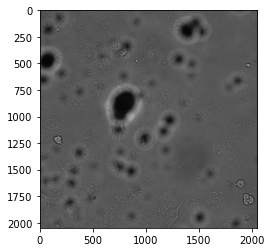

In [36]:
def COl2Gray(image):
    b,g,r = cv2.split(image)

    b = b/255
    g = g/255
    r = r/255

    image = cv2.merge((b,g,r))

    return  image

img = COl2Gray(img)
plt.imshow(img)

In [46]:
#gabor values
#ksize = 50 #for some reason 50 works? forgot our input image is big
lamda = 1*np.pi/4  #1/4 works best for angled.
gamma = .98 #.5 and .78 yields results
phi = 0
filters = []
kernel_images = []

for sigma in range(3,6,2):
    for x in range(1,4,2):
        theta = x*np.pi/4
        kernel = cv2.getGaborKernel((50,50), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
        filters.append(kernel)
        kernel_images.append( cv2.resize(kernel, (2048,2048)))
        print(sigma,theta)
        cv2.imshow("image"+str(sigma)+str(theta), kernel)
cv2.waitKey(0)
cv2.destroyAllWindows()

3 0.7853981633974483
3 2.356194490192345
5 0.7853981633974483
5 2.356194490192345


Text(0.5, 1.0, 'Gabor Kernel Resized')

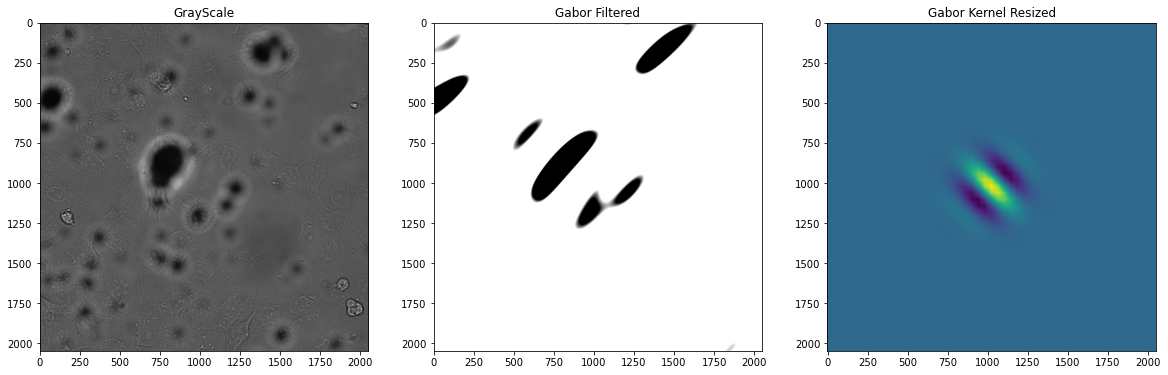

In [47]:
fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel_images[0])

kernel_resized = cv2.resize(kernel_images[1], (2048,2048))

fig, ax = plt.subplots(1,3, figsize=(20,10))

ax[0].imshow(img)
ax[0].set_title("GrayScale")

ax[1].imshow(fimg)
ax[1].set_title("Gabor Filtered")

ax[2].imshow(kernel_resized)
ax[2].set_title("Gabor Kernel Resized")



In [48]:
images = []
for x in range( len(kernel_images)):
    _img = cv2.filter2D(img, cv2.CV_8UC3, kernel_images[x])
    _img = cv2.resize(_img, (500,500))
    images.append(_img)
    cv2.imshow("kernel"+str(x),images[x])
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Gabor Kernel Resized')

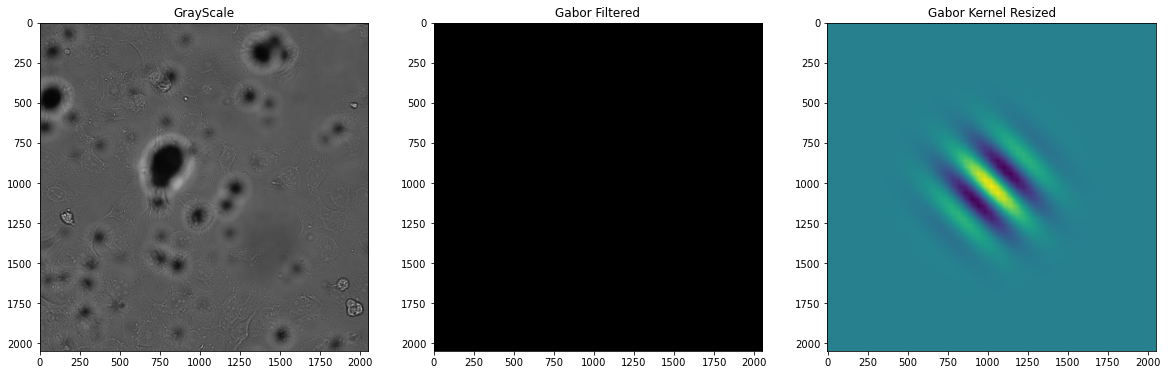

In [49]:
fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)

kernel_resized = cv2.resize(kernel, (2048,2048))

fig, ax = plt.subplots(1,3, figsize=(20,10))

ax[0].imshow(img)
ax[0].set_title("GrayScale")

ax[1].imshow(fimg)
ax[1].set_title("Gabor Filtered")

ax[2].imshow(kernel_resized)
ax[2].set_title("Gabor Kernel Resized")